In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def plot_image(image):
  plt.imshow(image,cmap='binary')
  plt.axis('off')

In [8]:
def show_reconstuctions(model, n_images=5):
  reconstructions = model.predict(X_valid[:n_images])
  fig = plt.figure(figsize=(n_images*1.5,3))

  for image_index in range(n_images):
    #Original Images
    plt.subplot(2,n_images,1+image_index)
    plot_image(X_valid[image_index])
    #Reconstructed Images
    plt.subplot(2,n_images,1+n_images+image_index)
    plot_image(reconstructions[image_index])

In [9]:
encoder_conv = tf.keras.models.Sequential([
                tf.keras.layers.Reshape([28,28,1],input_shape=[28,28]),
                tf.keras.layers.Conv2D(filters=16,kernel_size=3,padding='same',activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size=2),
                tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size=2),
                tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size=2)
             ])

In [10]:
encoder_conv.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)         

In [11]:
decoder_conv = tf.keras.models.Sequential([
                  tf.keras.layers.Convolution2DTranspose(filters=32,kernel_size=3,strides=2,padding='valid',activation='relu',input_shape=[3,3,64]),
                  tf.keras.layers.Convolution2DTranspose(filters=16,kernel_size=3,strides=2,padding='same',activation='relu'),
                  tf.keras.layers.Convolution2DTranspose(filters=1,kernel_size=3,strides=2,padding='same',activation='sigmoid'),
                  tf.keras.layers.Reshape([28,28])
            ])

In [12]:
decoder_conv.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 7, 7, 32)          18464     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 16)        4624      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         145       
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28)            0         
Total params: 23,233
Trainable params: 23,233
Non-trainable params: 0
_________________________________________________________________


In [13]:
AE_Conv = tf.keras.models.Sequential([encoder_conv,decoder_conv])
AE_Conv.compile(loss='binary_crossentropy',optimizer='adam')

In [14]:
#Load Dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

#Scale
X_train=training_images / 255.0
X_valid=test_images/255.0

4423680/4422102 [==============================] - 0s 0us/step


In [15]:
AE_Conv.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 3, 3, 64)          23296     
_________________________________________________________________
sequential_2 (Sequential)    (None, 28, 28)            23233     
Total params: 46,529
Trainable params: 46,529
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = AE_Conv.fit(X_train,X_train,epochs=10,verbose=2,validation_data=(X_valid,X_valid))

Epoch 1/10
1875/1875 - 53s - loss: 0.2989 - val_loss: 0.2776
Epoch 2/10
1875/1875 - 51s - loss: 0.2715 - val_loss: 0.2706
Epoch 3/10
1875/1875 - 52s - loss: 0.2669 - val_loss: 0.2676
Epoch 4/10
1875/1875 - 51s - loss: 0.2645 - val_loss: 0.2658
Epoch 5/10
1875/1875 - 52s - loss: 0.2630 - val_loss: 0.2643
Epoch 6/10
1875/1875 - 53s - loss: 0.2619 - val_loss: 0.2635
Epoch 7/10
1875/1875 - 54s - loss: 0.2611 - val_loss: 0.2629
Epoch 8/10
1875/1875 - 54s - loss: 0.2604 - val_loss: 0.2622
Epoch 9/10
1875/1875 - 54s - loss: 0.2599 - val_loss: 0.2615
Epoch 10/10
1875/1875 - 54s - loss: 0.2594 - val_loss: 0.2614


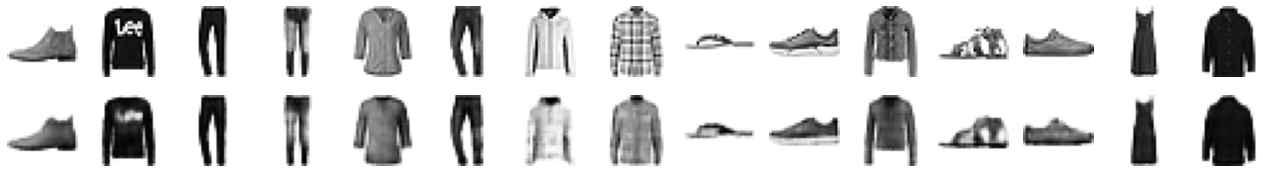

In [17]:
show_reconstuctions(AE_Conv,15)